In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Evolutionary Algorithm
Very NB, in my view

## Genetic Algo
* [什么是遗传算法](什么是遗传算法)
![img](https://morvanzhou.github.io/static/results/evolutionary-algorithm/2-1-0.gif)


* **fitness Function**

所有的遗传算法 (Genetic Algorithm), 后面都简称 GA, 我们都需要一个评估好坏的方程, 这个方程通常被称为 fitness. 在今天的问题中, 我们找到下面这个曲线当中的最高点. 那么这个 fitness 方程就很好定, 越高的点, fitness 越高.

如果这个曲线上任一点的 y 值是 pred 的话, 我们的 fitness 就是下面这样:

In [8]:
# find non-zero fitness for selection
def get_fitness(pred): return pred + 1e-3 - np.min(pred)

* **DNA coding**

在 GA 中有基因, 为了方便, 我们直接就称为 DNA 吧. GA 中第二重要的就是这 DNA 了, 如何编码和解码 DNA, 就是你使用 GA 首先要想到的问题. 传统的 GA 中, DNA 我们能用一串二进制来表示, 比如:
```python
DNA1 = [1, 1, 0, 1, 0, 0, 1]
DNA2 = [1, 0, 1, 1, 0, 1, 1]
```
但是长成这样的 DNA 并不好使用. 如果要将它解码, 我们可以将二进制转换成十进制, 比如二进制的 11 就是十进制的 3. 这种转换的步骤在程序中很好执行. 但是有时候我们会需要精确到小数, 其实也很简单, 只要再将十进制的数浓缩一下就好. 比如我有 1111 这么长的 DNA, 我们产生的十进制数范围是 [0, 15], 而我需要的范围是 [-1, 1], 我们就将 [0, 15] 缩放到 [-1, 1] 这个范围就好.

In [3]:
def translateDNA(pop):
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]
# >>> 2**np.arange(4)
# array([1, 2, 4, 8], dtype=int32)
# >>> 2**np.arange(4)[::-1]
# array([8, 4, 2, 1], dtype=int32)
# >>> 

注意, 这里的 pop 是一个储存二进制 DNA 的矩阵, 他的 shape 是这样 (pop_size, DNA_size).

* **进化啦~**

进化分三步：
1. 适者生存(selection)
2. DNA交叉配对(cross over)
3. DNA变异(mutation)

select()很简单, 我们只要按照适应程度 fitness 来选 pop 中的 parent 就好. fitness 越大, 越有可能被选到.

In [4]:
def select(pop,fitness):
    idx = np.random.choice(np.arange(POP_SIZE),size=POP_SIZE,replace=True,
                           p=fitness/fitness.sum()) #p 是选他的比例
             #replace=T means allow repeated elements
    return pop[idx]

接下来进行交叉配对. 方式很简单. 比如这两个 DNA, Y 的点我们取 DNA1 中的元素, N 的点取 DNA2 中的. 生成的 DNA3 就有来自父母的基因了.
```python
DNA1 = [1, 1, 0, 1, 0, 0, 1]
       [Y, N, Y, N, N, Y, N]
DNA2 = [1, 0, 1, 1, 0, 1, 1]

DNA3 = [1, 0, 0, 1, 0, 0, 1]
```
而 python 写出来也很方便, 从 pop_copy 中随便选一个当另一个父辈 和 parent 进行随机的 crossover:

In [5]:
def crossover(parent,pop):
    if np.random.rand()<CROSS_RATE:
        i_ = np.random.randint(0,POP_SIZE,1)
        cross_points = np.random.randint(0,2,DNA_SIZE).astype(np.bool)
        parent[cross_points] = pop[i_,cross_points]
    return parent

mutation 就更好写了, 将某些 DNA 中的 0 变成 1, 1 变成 0.

In [6]:
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand()<= MUTATION_RATE:
            child[point]=1 if child[point] == 0 else 0
    return child

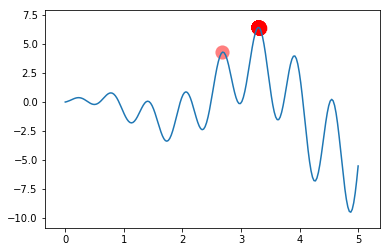

In [12]:
#种群Dna
DNA_SIZE = 10            # DNA length
POP_SIZE = 100           # population size
CROSS_RATE = 0.8         # mating probability (DNA crossover)
MUTATION_RATE = 0.003    # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds
F = lambda x:np.sin(10*x)*x + np.cos(2*x)*x
pop = np.random.randint(2,size=(POP_SIZE,DNA_SIZE))

# plt.ion()
x = np.linspace(*X_BOUND,200)
plt.plot(x,F(x))
for _ in range(N_GENERATIONS):
    F_values = F(translateDNA(pop))
    
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5);# plt.pause(0.05)

    fitness = get_fitness(F_values)
#     print("Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop,fitness) #按适应度选pop
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent,pop_copy)
        child = mutate(child)
        parent[:] = child #宝宝变大人 ，a tricky way
#plt.ioff();
plt.show()

## Application: 句子配对
通过不同的编码 DNA 方式, 不同的 fitness 定义方式来让程序生成出自己设定的句子来.

In [28]:
TARGET_PHRASE = 'I love you!' 
POP_SIZE = 300                      # population size
CROSS_RATE = 0.4                    # mating probability (DNA crossover)
MUTATION_RATE = 0.01                # mutation probability
N_GENERATIONS = 1000

DNA_SIZE = len(TARGET_PHRASE)
TARGET_ASCII = np.fromstring(TARGET_PHRASE, dtype=np.uint8)  # convert string to number
ASCII_BOUND = [32, 126]

In [26]:
class GA(object):
    def __init__(self, DNA_size, DNA_bound, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        DNA_bound[1] += 1
        self.DNA_bound = DNA_bound
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        self.pop = np.random.randint(*DNA_bound, size=(pop_size, DNA_size)).astype(np.uint8)  # int8 for convert to ASCII
    def translateDNA(self,DNA):   # convert to readable string
        return DNA.tostring().decode('ascii')
    def get_fitness(self):
        return (self.pop == TARGET_ASCII).sum(axis = 1)
    def select(self):
        fitness = self.get_fitness() + 1e-4 # to avoid 0 in denominater
        idx = np.random.choice(np.arange(self.pop_size),size=self.pop_size,replace=True,
                    p=fitness/fitness.sum())
        return self.pop[idx]
    def crossover(self,parent,pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
        return parent
    
    def mutate(self,child):
        for point in range(self.DNA_size):
            if np.random.rand() <= self.mutate_rate:
                child[point] = np.random.randint(*self.DNA_bound,dtype=np.uint8)
        return child
    
    def evolve(self):
        pop = self.select()
        pop_copy = pop.copy()
        for parent in pop_copy:
            child = self.crossover(parent,pop)
            child = self.mutate(child)
            parent = child
        self.pop = pop_copy          
            
    

In [29]:
ga = GA(DNA_size=DNA_SIZE, DNA_bound=ASCII_BOUND, cross_rate=CROSS_RATE,
        mutation_rate=MUTATION_RATE, pop_size=POP_SIZE)
for generation in range(N_GENERATIONS):
    fitness = ga.get_fitness()
    best_DNA = ga.pop[np.argmax(fitness)]
    print(best_DNA,end='')
    best_phrase = ga.translateDNA(best_DNA)
    print('Gen', generation, ': ', best_phrase)
    if best_phrase == TARGET_PHRASE:
        break
    ga.evolve()

[105  56  35  39  83 109  67  91 111 117 120]Gen 0 :  i8#'SmC[oux
[ 73 118  85  86 118 101 100  55 114  63  87]Gen 1 :  IvUVved7r?W
[121  72 112 111 118 101  58  55 111  96  54]Gen 2 :  yHpove:7o`6
[121  72 112 111 118 101  58  55 111  96  54]Gen 3 :  yHpove:7o`6
[ 54  96  83 111  60 101  32  50  73  94  33]Gen 4 :  6`So<e 2I^!
[121  32  41 111 118  90  32  81 111  96  95]Gen 5 :  y )ovZ Qo`_
[ 73 119 108 111 118 101  58  94  49  34  54]Gen 6 :  Iwlove:^1"6
[ 73 119  86 111 118 101  32  85 111  33  54]Gen 7 :  IwVove Uo!6
[ 73  32 108  73 118 100 109  96 111 117  33]Gen 8 :  I lIvdm`ou!
[ 73  32 108  73 118 100 109  96 111 117  33]Gen 9 :  I lIvdm`ou!
[ 73  32 108 111 118  90  32  81 111  96  33]Gen 10 :  I lovZ Qo`!
[ 73  32 108 111 118 101  58  94 111 117  33]Gen 11 :  I love:^ou!
[ 73  32 108 111 118 101  58  94 111 117  33]Gen 12 :  I love:^ou!
[ 73  32 108 111 118 101  58  94 111 117  33]Gen 13 :  I love:^ou!
[ 73  32 108 111 118 101  58  94 111 117  33]Gen 14 :  I love:^ou!
[ 73 